Data Collection: Gather a large dataset of news articles. This could be done through web scraping, APIs, or using existing datasets.

Text Preprocessing:

Tokenization: Split the text into words or tokens.
Stopword Removal: Eliminate common words that don't contribute much meaning (like "and", "the", etc.).
Stemming/Lemmatization: Reduce words to their base or root form.
Removing Punctuation and Special Characters: Clean up the text to retain only alphanumeric characters.
Feature Extraction:

Convert text data into numerical form using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings (like Word2Vec, GloVe).
These methods help in representing text in a way that captures the semantic meaning and importance of words in the document.
Dimensionality Reduction (Optional but recommended for large datasets):

Techniques like PCA (Principal Component Analysis) or t-SNE can be used to reduce the number of features while retaining the essential information.
This step helps in reducing computational complexity and improving clustering performance.
Clustering:

Apply clustering algorithms like K-means, DBSCAN, or Hierarchical clustering on the processed text data.
These algorithms will group articles into clusters based on the similarity of their content.
NLP Techniques for Improved Clustering:

Topic Modeling: Techniques like LDA (Latent Dirichlet Allocation) can be used to identify topics within the articles. This can guide or enhance the clustering process.
Named Entity Recognition (NER): Identifying and classifying key entities (like people, organizations, locations) can provide additional features for clustering.
Sentiment Analysis: Understanding the sentiment of the articles might also help in clustering, especially for differentiating articles with similar content but different tones.

In [63]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

sys.path.append("../")

from pipeline import *

## Get news articles from the web

In [64]:
# URL for the google news search of "Crude oil storage"
url = "https://news.google.com/search?q=crude%20oil&hl=no&gl=NO&ceid=NO%3Ano"

url_data = get_url_gnews(url)

news_data = create_news_df(url_data)

display(news_data)

97it [03:05,  1.92s/it]


,title,text,url
2024-01-10 16:23:43+00:00,EIA predicts crude oil price will remain flat ...,Steel pipelines in a crude oil factory. Credit...,https://news.google.com/articles/CBMicmh0dHBzO...
2024-01-11 09:03:17+00:00,EIA expects relatively flat crude oil prices i...,The EIA forecasts average annual crude oil pri...,https://news.google.com/articles/CBMid2h0dHBzO...
2024-01-11 11:05:35+00:00,EIA forecasts stable crude oil prices for 2024...,As U.S. Energy Information Administration (EIA...,https://news.google.com/articles/CBMiT2h0dHBzO...
2024-01-09 04:00:41+00:00,Economic worries and new supplies temper outlo...,Cookies on FT Sites\n\nWe use cookies and othe...,https://news.google.com/articles/CBMiP2h0dHBzO...
2024-01-08 15:00:31+00:00,U.S. crude oil falls 4% as Saudi price cut hei...,An employee in a branded helmet is pictured at...,https://news.google.com/articles/CBMidGh0dHBzO...
...,...,...,...
2024-01-10 03:09:00+00:00,Russian crude oil exports in the first week of...,Info via Oil price:\n\nAt the latest OPEC+ mee...,https://news.google.com/articles/CBMib2h0dHBzO...
2024-01-10 19:34:06+00:00,February WTI Crude Oil Contract Closes Down US...,To use this feature you must be a member,https://news.google.com/articles/CBMinAFodHRwc...
2024-01-05 18:36:48+00:00,WTI tests $74 as Crude Oil gets dragged higher...,Share:\n\nCrude Oil markets bumped on continue...,https://news.google.com/articles/CBMicGh0dHBzO...
2024-01-10 11:04:00+00:00,Latest World & National News & Headlines,Saban could have won for many more years. We w...,https://news.google.com/articles/CBMiSWh0dHBzO...


In [65]:
url = "https://news.google.com/search?q=norwegian%20salmon&hl=no&gl=NO&ceid=NO%3Ano"

salmon_url_data = get_url_gnews(url)

salmon_data = create_news_df(salmon_url_data)

display(salmon_data)


100it [02:04,  1.25s/it]


,title,text,url
2023-06-27 07:00:00+00:00,Nedgang på Oslo Børs – Andfjord Salmon falt tungt,Nedgang på Oslo Børs – Andfjord Salmon falt tu...,https://news.google.com/articles/CBMiWWh0dHBzO...
2023-01-09 08:00:00+00:00,Kvarøy gjør norsk laks helnorsk. Vil ikke leng...,Selskapet satser nesten all sin lakseproduksjo...,https://news.google.com/articles/CBMihgFodHRwc...
2024-01-10 20:27:00+00:00,Why is a Norwegian political delegation visiti...,A delegation of Norwegian politicians is sched...,https://news.google.com/articles/CBMijgFodHRwc...
2024-01-11 10:03:53+00:00,Norwegian salmon prices increase at the start ...,Norwegian salmon prices increase at the start ...,https://news.google.com/articles/CBMiZWh0dHBzO...
2024-01-10 09:32:26+00:00,SalMar denies China fish smuggling claims,SalMar has strongly denied a Norwegian radio r...,https://news.google.com/articles/CBMiWGh0dHBzO...
...,...,...,...
2023-12-15 08:00:00+00:00,"Norway OKs $46 million marketing plan, focuses...",Norway will set its sights firmly on the Unite...,https://news.google.com/articles/CBMiZ2h0dHBzO...
2023-11-15 08:00:00+00:00,Salmon infected with ISA left in pens for mont...,Norway-based salmon farmer Salaks has taken pa...,https://news.google.com/articles/CBMigAFodHRwc...
2023-09-13 07:00:00+00:00,Nova Sea moving ahead with construction of $19...,Norway-based salmon famer Nova Sea is pressing...,https://news.google.com/articles/CBMilQFodHRwc...
2023-07-26 07:00:00+00:00,Norwegian salmon prices experience 6.32 percen...,Norwegian salmon prices experience 6.32 percen...,https://news.google.com/articles/CBMicGh0dHBzO...


In [66]:
salmon_data["label"] = "Salmon"
news_data["label"] = "Crude Oil"

news_data = pd.concat([news_data, salmon_data])

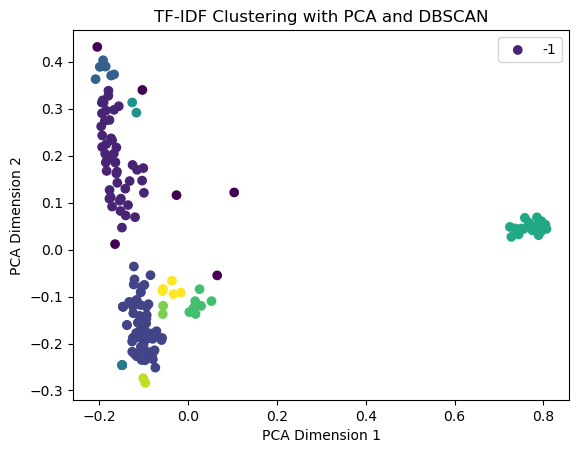

,title,text,url,label,cluster
2024-01-10 16:23:43+00:00,EIA predicts crude oil price will remain flat ...,Steel pipelines in a crude oil factory. Credit...,https://news.google.com/articles/CBMicmh0dHBzO...,Crude Oil,0
2024-01-11 09:03:17+00:00,EIA expects relatively flat crude oil prices i...,The EIA forecasts average annual crude oil pri...,https://news.google.com/articles/CBMid2h0dHBzO...,Crude Oil,0
2024-01-11 11:05:35+00:00,EIA forecasts stable crude oil prices for 2024...,As U.S. Energy Information Administration (EIA...,https://news.google.com/articles/CBMiT2h0dHBzO...,Crude Oil,0
2024-01-09 04:00:41+00:00,Economic worries and new supplies temper outlo...,Cookies on FT Sites\n\nWe use cookies and othe...,https://news.google.com/articles/CBMiP2h0dHBzO...,Crude Oil,1
2024-01-08 15:00:31+00:00,U.S. crude oil falls 4% as Saudi price cut hei...,An employee in a branded helmet is pictured at...,https://news.google.com/articles/CBMidGh0dHBzO...,Crude Oil,0
...,...,...,...,...,...
2023-12-15 08:00:00+00:00,"Norway OKs $46 million marketing plan, focuses...",Norway will set its sights firmly on the Unite...,https://news.google.com/articles/CBMiZ2h0dHBzO...,Salmon,1
2023-11-15 08:00:00+00:00,Salmon infected with ISA left in pens for mont...,Norway-based salmon farmer Salaks has taken pa...,https://news.google.com/articles/CBMigAFodHRwc...,Salmon,1
2023-09-13 07:00:00+00:00,Nova Sea moving ahead with construction of $19...,Norway-based salmon famer Nova Sea is pressing...,https://news.google.com/articles/CBMilQFodHRwc...,Salmon,1
2023-07-26 07:00:00+00:00,Norwegian salmon prices experience 6.32 percen...,Norwegian salmon prices experience 6.32 percen...,https://news.google.com/articles/CBMicGh0dHBzO...,Salmon,5


In [69]:
documents = news_data['text'].tolist()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# PCA dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# DBSCAN clustering
dbscan = DBSCAN(eps=0.03, min_samples=2)
clusters = dbscan.fit_predict(X_reduced)

# add cluster labels to plot legend
unique_labels = np.unique(clusters)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("TF-IDF Clustering with PCA and DBSCAN")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(unique_labels)
plt.show()


# add cluster labels to dataframe
news_data['cluster'] = clusters

display(news_data)

In [70]:
# display all cluster from news_data
for cluster in np.unique(clusters):
    print("Cluster {}".format(cluster))
    display(news_data[news_data['cluster'] == cluster])

Cluster -1


,title,text,url,label,cluster
2024-01-11 10:30:00+00:00,Oil tanker in Gulf of Oman boarded by 'unautho...,"An oil tanker was boarded by ""armed unauthoris...",https://news.google.com/articles/CBMic2h0dHBzO...,Crude Oil,-1
2024-01-10 20:39:40+00:00,Oil futures: Crude surrenders gains on surpris...,Oil futures: Crude surrenders gains on surpris...,https://news.google.com/articles/CBMiaGh0dHBzO...,Crude Oil,-1
2024-01-05 12:05:13+00:00,USA Commercial Crude Oil Inventories Drop,"U.S. commercial crude oil inventories, excludi...",https://news.google.com/articles/CBMiYmh0dHBzO...,Crude Oil,-1
2024-01-11 06:02:30+00:00,KUNA : KPC: Kuwait crude oil price up USD 1.13...,"11/01/2024 LOC08:59 05:59 GMT\n\nKUWAIT, Jan 1...",https://news.google.com/articles/CBMiQmh0dHBzO...,Crude Oil,-1
2024-01-08 16:39:05+00:00,Canadian Dollar tests low side on Monday as Cr...,Share:\n\nMost recent article: Canadian Dollar...,https://news.google.com/articles/CBMiaWh0dHBzO...,Crude Oil,-1
2023-12-20 08:00:00+00:00,Norwegian salmon prices in late Christmas lift,Fresh salmon prices in Norway have surged to t...,https://news.google.com/articles/CBMiXWh0dHBzO...,Salmon,-1


Cluster 0


,title,text,url,label,cluster
2024-01-10 16:23:43+00:00,EIA predicts crude oil price will remain flat ...,Steel pipelines in a crude oil factory. Credit...,https://news.google.com/articles/CBMicmh0dHBzO...,Crude Oil,0
2024-01-11 09:03:17+00:00,EIA expects relatively flat crude oil prices i...,The EIA forecasts average annual crude oil pri...,https://news.google.com/articles/CBMid2h0dHBzO...,Crude Oil,0
2024-01-11 11:05:35+00:00,EIA forecasts stable crude oil prices for 2024...,As U.S. Energy Information Administration (EIA...,https://news.google.com/articles/CBMiT2h0dHBzO...,Crude Oil,0
2024-01-08 15:00:31+00:00,U.S. crude oil falls 4% as Saudi price cut hei...,An employee in a branded helmet is pictured at...,https://news.google.com/articles/CBMidGh0dHBzO...,Crude Oil,0
2024-01-08 12:11:42+00:00,Norway's Equinor to leave Azerbaijan,Norway's national oil company Equinor has anno...,https://news.google.com/articles/CBMiOmh0dHBzO...,Crude Oil,0
2024-01-10 14:30:27+00:00,Russia curbs crude oil production while pumpin...,Russia curbs crude oil production while pumpin...,https://news.google.com/articles/CBMicWh0dHBzO...,Crude Oil,0
2024-01-11 06:09:47+00:00,Crude Oil Prices Drop as US Oil Inventories Un...,Crude Oil Prices Drop as US Oil Inventories Un...,https://news.google.com/articles/CBMieGh0dHBzO...,Crude Oil,0
2024-01-11 08:06:29+00:00,Oil Forecast Today -11/01: Looking Direction (...,"WTI Crude Oil\n\nRegarding WTI Crude Oil, the ...",https://news.google.com/articles/CBMiZWh0dHBzO...,Crude Oil,0
2024-01-10 19:54:00+00:00,Crude oil futures settles at $71.37,The price of crude oil futures is settling at ...,https://news.google.com/articles/CBMiWGh0dHBzO...,Crude Oil,0
2024-01-10 21:32:01+00:00,Russian Oil Statistics Imply Sector Hard to Crack,The price for Russia's Urals crude oil export ...,https://news.google.com/articles/CBMiQGh0dHBzO...,Crude Oil,0


Cluster 1


,title,text,url,label,cluster
2024-01-09 04:00:41+00:00,Economic worries and new supplies temper outlo...,Cookies on FT Sites\n\nWe use cookies and othe...,https://news.google.com/articles/CBMiP2h0dHBzO...,Crude Oil,1
2024-01-11 09:00:01+00:00,Norway's 2024 Crude Oil Output Seen At 99.5 Mc...,Investors are moving on from the recession tha...,https://news.google.com/articles/CBMidmh0dHBzO...,Crude Oil,1
2024-01-11 09:26:46+00:00,Midday update for Crude oil 11-01-2024,Risk Disclaimer: Economies.com is a financial ...,https://news.google.com/articles/CBMiYGh0dHBzO...,Crude Oil,1
2024-01-08 17:07:06+00:00,Oil drops sharply as Saudi price cuts overshad...,Then kr. 285 per 3 months. The new FT Digital ...,https://news.google.com/articles/CBMiP2h0dHBzO...,Crude Oil,1
2024-01-10 15:39:00+00:00,US weekly EIA crude oil inventories +1338K vs ...,From @ecb | 20 hr ago\n\npost: @Isabel_Schnabe...,https://news.google.com/articles/CBMiVmh0dHBzO...,Crude Oil,1
...,...,...,...,...,...
2023-08-10 07:00:00+00:00,Norway land-based salmon project goes bankrupt,"In Oygarden outside Bergen in western Norway, ...",https://news.google.com/articles/CBMiXGh0dHBzO...,Salmon,1
2023-12-12 05:01:00+00:00,'The tax system is for practical reasons not w...,While Norway’s controversial new 25 percent aq...,https://news.google.com/articles/CBMingFodHRwc...,Salmon,1
2023-12-15 08:00:00+00:00,"Norway OKs $46 million marketing plan, focuses...",Norway will set its sights firmly on the Unite...,https://news.google.com/articles/CBMiZ2h0dHBzO...,Salmon,1
2023-11-15 08:00:00+00:00,Salmon infected with ISA left in pens for mont...,Norway-based salmon farmer Salaks has taken pa...,https://news.google.com/articles/CBMigAFodHRwc...,Salmon,1


Cluster 2


,title,text,url,label,cluster
2024-01-11 04:53:15+00:00,Crude oil gains despite surprise rise in US in...,Despite a surprise increase in crude oil inven...,https://news.google.com/articles/CBMiggFodHRwc...,Crude Oil,2
2024-01-11 08:53:11+00:00,Oil futures: Crude rebounds after major shippi...,Oil futures: Crude rebounds after major shippi...,https://news.google.com/articles/CBMicGh0dHBzO...,Crude Oil,2
2024-01-11 10:00:11+00:00,Oil futures: Crude rebounds after major shippi...,Oil futures: Crude rebounds after major shippi...,https://news.google.com/articles/CBMic2h0dHBzO...,Crude Oil,2
2024-01-10 17:13:05+00:00,"U.S. Crude Oil, Products Stocks Rose in First ...",By Anthony Harrup\n\nU.S. crude oil inventorie...,https://news.google.com/articles/CBMijAFodHRwc...,Crude Oil,2
2024-01-10 03:41:00+00:00,Oil prices fall 1% after surprise US storage b...,An oil pumpjack is seen near a field of wind t...,https://news.google.com/articles/CBMiV2h0dHBzO...,Crude Oil,2
2024-01-10 15:54:00+00:00,"U.S. Crude Oil, Products Stocks Rose in First ...",By Anthony Harrup\n\nU.S. crude oil inventorie...,https://news.google.com/articles/CBMiZmh0dHBzO...,Crude Oil,2
2024-01-02 08:00:00+00:00,Brent crude oil prices averaged $19 per barrel...,"In-brief analysis\n\nData source: Bloomberg, L...",https://news.google.com/articles/CBMiNWh0dHBzO...,Crude Oil,2


Cluster 3


,title,text,url,label,cluster
2024-01-11 09:31:18+00:00,Crude Oil Prices Edge Higher On Further Attack...,To use this feature you must be a member,https://news.google.com/articles/CBMiqwFodHRwc...,Crude Oil,3
2024-01-11 10:57:15+00:00,"Crude Oil Prices To Stay Flat In 2024, 2025 On...",To use this feature you must be a member,https://news.google.com/articles/CBMipQFodHRwc...,Crude Oil,3
2024-01-10 19:44:05+00:00,WTI Crude Oil Closes Lower as Rising US Invent...,To use this feature you must be a member,https://news.google.com/articles/CBMinQFodHRwc...,Crude Oil,3
2024-01-10 19:34:06+00:00,February WTI Crude Oil Contract Closes Down US...,To use this feature you must be a member,https://news.google.com/articles/CBMinAFodHRwc...,Crude Oil,3


Cluster 4


,title,text,url,label,cluster
2024-01-11 04:10:56+00:00,EIA: US crude inventories up 1.3 million bbl,US crude oil inventories for the week ended Ja...,https://news.google.com/articles/CBMiYGh0dHBzO...,Crude Oil,4
2024-01-08 19:56:00+00:00,Crude oil futures settle at $70.77,Crude oil futures are settling at $70.77. That...,https://news.google.com/articles/CBMiV2h0dHBzO...,Crude Oil,4


Cluster 5


,title,text,url,label,cluster
2024-01-11 10:03:53+00:00,Norwegian salmon prices increase at the start ...,Norwegian salmon prices increase at the start ...,https://news.google.com/articles/CBMiZWh0dHBzO...,Salmon,5
2023-12-20 08:00:00+00:00,Norwegian salmon prices ending 2023 near where...,Norwegian salmon prices ending 2023 near where...,https://news.google.com/articles/CBMibmh0dHBzO...,Salmon,5
2024-01-03 21:11:15+00:00,Norwegian salmon prices increased at the end o...,Norwegian salmon prices increased at the end o...,https://news.google.com/articles/CBMiXWh0dHBzO...,Salmon,5
2023-11-23 08:00:00+00:00,Average per-kilo price of Norwegian salmon dow...,Average per-kilo price of Norwegian salmon dow...,https://news.google.com/articles/CBMicWh0dHBzO...,Salmon,5
2023-12-14 08:00:00+00:00,"Norwegian salmon prices remain flat, futures p...","Norwegian salmon prices remain flat, futures p...",https://news.google.com/articles/CBMihAFodHRwc...,Salmon,5
2023-11-29 19:52:32+00:00,Norwegian salmon prices have risen 11 percent ...,Norwegian salmon prices have risen 11 percent ...,https://news.google.com/articles/CBMieGh0dHBzO...,Salmon,5
2023-12-07 08:00:00+00:00,Rising Norwegian salmon prices not slowing demand,Rising Norwegian salmon prices not slowing dem...,https://news.google.com/articles/CBMie2h0dHBzO...,Salmon,5
2023-11-08 08:00:00+00:00,"Norwegian salmon exports to the EU, US, China ...","Norwegian salmon exports to the EU, US, China ...",https://news.google.com/articles/CBMiiQFodHRwc...,Salmon,5
2023-10-25 07:00:00+00:00,Norwegian salmon prices creep back up in week ...,Norwegian salmon prices creep back up in week ...,https://news.google.com/articles/CBMid2h0dHBzO...,Salmon,5
2023-07-19 07:00:00+00:00,"Norwegian salmon prices, volumes mostly flat","Norwegian salmon prices, volumes mostly flat\n...",https://news.google.com/articles/CBMiYGh0dHBzO...,Salmon,5


Cluster 6


,title,text,url,label,cluster
2024-01-05 10:03:45+00:00,Norway year end salmon prices back over NOK 10...,The export price for fresh Norwegian salmon su...,https://news.google.com/articles/CBMiZWh0dHBzO...,Salmon,6
2024-01-04 10:03:47+00:00,Salmon rules as Norwegian seafood exports hit ...,Norway’s seafood exports last year hit a recor...,https://news.google.com/articles/CBMibmh0dHBzO...,Salmon,6
2023-11-02 07:00:00+00:00,Norwegian salmon exports break NOK 100bn barrier,The value of Norwegian salmon exports has now ...,https://news.google.com/articles/CBMiX2h0dHBzO...,Salmon,6
2023-12-05 08:00:00+00:00,Sagging krone further boosts Norway’s salmon e...,Norway’s seafood exports for November totalled...,https://news.google.com/articles/CBMiYmh0dHBzO...,Salmon,6
2023-12-15 08:00:00+00:00,Norway salmon prices rise ahead of Christmas,Norwegian salmon prices are rising slightly in...,https://news.google.com/articles/CBMiWWh0dHBzO...,Salmon,6
2023-08-04 07:00:00+00:00,China's demand for Norwegian salmon reaches ne...,Norway's salmon exports to China rocketed 60 p...,https://news.google.com/articles/CBMibGh0dHBzO...,Salmon,6
2023-08-25 07:00:00+00:00,High farmed salmon prices here to stay: Nordea...,"A new era for farmed salmon prices is upon us,...",https://news.google.com/articles/CBMigAFodHRwc...,Salmon,6


Cluster 7


,title,text,url,label,cluster
2024-01-02 11:11:00+00:00,Norwegian salmon farmer wins $1.3 million in c...,Norwegian salmon producer Masoval has won NOK ...,https://news.google.com/articles/CBMif2h0dHBzO...,Salmon,7
2023-09-29 07:00:00+00:00,Norway farmed salmon prices continue higher as...,Norwegian salmon prices have consolidated rece...,https://news.google.com/articles/CBMicWh0dHBzO...,Salmon,7


Cluster 8


,title,text,url,label,cluster
2023-05-26 07:00:00+00:00,Norway sets salmon tax at 25 percent,"The new proposal was greeted as being ""signifi...",https://news.google.com/articles/CBMiRWh0dHBzO...,Salmon,8
2023-09-29 07:00:00+00:00,Infectious salmon anemia outbreak suspected at...,A suspected outbreak of infectious salmon anem...,https://news.google.com/articles/CBMib2h0dHBzO...,Salmon,8


Cluster 9


,title,text,url,label,cluster
2023-11-09 08:00:00+00:00,Norwegian salmon giant SalMar puts offshore in...,Gustav Witzoe-owned farmed salmon giant SalMar...,https://news.google.com/articles/CBMihQFodHRwc...,Salmon,9
2024-01-08 04:01:00+00:00,Investors ran away from land-based salmon stoc...,CORRECTION: The original version of this repor...,https://news.google.com/articles/CBMigAFodHRwc...,Salmon,9
2023-10-27 07:00:00+00:00,Tumbling market hammers Norway salmon supplier...,Norwegian salmon prices have fallen for the se...,https://news.google.com/articles/CBMic2h0dHBzO...,Salmon,9
2023-12-01 08:00:00+00:00,Norway salmon prices stabilize as buyers hold ...,Norwegian salmon prices have remained largely ...,https://news.google.com/articles/CBMiX2h0dHBzO...,Salmon,9
2023-11-10 08:00:00+00:00,Norwegian salmon price tug of war leaves marke...,Norwegian salmon prices remained largely flat ...,https://news.google.com/articles/CBMiYWh0dHBzO...,Salmon,9
